# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Ben 5002
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [3]:
#loading the data sets

#loading the train set
trainSet = pd.read_csv('titanic_train.csv')
trainSet.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [4]:
#loading the test set
testSet = pd.read_csv('titanic_test.csv')
testSet.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [5]:
#for own use the full train data set view
trainSet

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.000000,1,0,78.2667,1,1
1,2,0,45.000000,0,0,13.5000,0,1
2,3,1,20.000000,0,0,9.5000,0,0
3,3,1,36.000000,0,0,7.8958,0,0
4,3,1,22.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
707,1,1,54.000000,0,0,51.8625,0,0
708,3,1,14.000000,5,2,46.9000,0,0
709,2,0,6.000000,0,1,33.0000,0,1
710,2,1,29.699118,0,0,0.0000,0,0


In [6]:
#info about the train set
trainSet.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


Text(0, 0.5, 'Frequency')

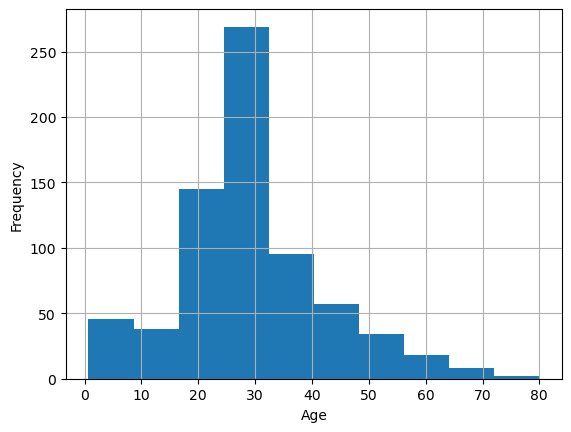

In [7]:
#Visualization and statistics

# 1.Histogram that visualising the age frequency on the ship at the trainset

trainSet.Age.hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')

Survived         0         1
Sex                         
0         0.246094  0.753906
1         0.807018  0.192982


Text(0, 0.5, 'Relative frequency')

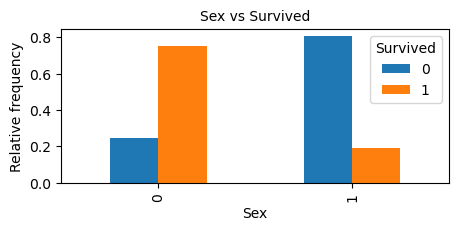

In [8]:
# 2.normalized cross tabulation that represents the survivers ratio between men and women 
ct = pd.crosstab(trainSet['Sex'], trainSet['Survived'], normalize='index')
print(ct)

#visualisation of the cross tabulation through bar plot
ct.plot(kind='bar', figsize=(5, 2))
plt.title('Sex vs Survived', fontsize=10)
plt.xlabel('Sex')
plt.ylabel('Relative frequency')

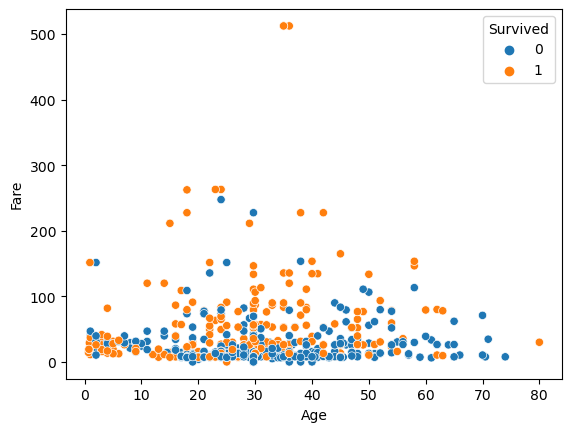

In [9]:
# 3.scatter plot that visualise the spread and the connection of age,fare and if survived or not
sns.scatterplot(x = 'Age', y = 'Fare', hue ='Survived', data=trainSet);

In [10]:
#we can see that the ticket prices above 400 are not reasonable and not have really connection to the class,we consider it as outliers
trainSet['Pclass'].value_counts()

Pclass
3    388
1    178
2    146
Name: count, dtype: int64

In [11]:
#removing the outliers depend on the visualization
trainSet = trainSet[trainSet['Fare']<=400]
trainSet['Pclass'].value_counts()

Pclass
3    388
1    175
2    146
Name: count, dtype: int64

In [12]:
# 4.Using Chi-squared test to gauge whether there is a difference between the classes between those who survived and those who didnt survived 
ct2 = pd.crosstab(trainSet['Pclass'], trainSet['Survived'])
ct2

Survived,0,1
Pclass,,
1,65,110
2,79,67
3,287,101


In [13]:
Pvalue = (chi2_contingency(ct2))[1]
print(Pvalue)
print("---------------------")
print("conclusion is that there is essential difference between the groups")

2.2492419809756613e-16
---------------------
conclusion is that there is essential difference between the groups


Text(0, 0.5, 'Relative frequency')

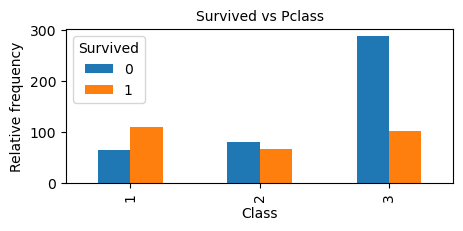

In [14]:
#the visialisasion
ct2.plot(kind='bar', figsize=(5, 2))
plt.title('Survived vs Pclass', fontsize=10)
plt.xlabel('Class')
plt.ylabel('Relative frequency')

## Part 3 - Experiments
You could add as many code cells as needed

In [15]:
#spliting the feature vectors and the target values from the train set
X = trainSet.loc[:,trainSet.columns != 'Survived']
y = trainSet['Survived']

print(X.head())
print("-------")
print(y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       1    0  54.0      1      0  78.2667         1
1       2    0  45.0      0      0  13.5000         0
2       3    1  20.0      0      0   9.5000         0
3       3    1  36.0      0      0   7.8958         0
4       3    1  22.0      0      0   8.0500         0
-------
0    1
1    1
2    0
3    0
4    0
Name: Survived, dtype: int64


### 1. Model by KNN algorithm

#### KNN on original TrainSet

In [16]:
#first of all lets create grid search table which will contain all the necessary parameters for the exam
classifierAlgo = KNeighborsClassifier()
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
k_range = [x for x in range(1,20) if x%2 == 1]
param_grid = dict(n_neighbors=k_range, weights = weights, metric = metric )
grid_search_knn=GridSearchCV(classifierAlgo, param_grid,cv=5,scoring='f1', return_train_score=False)
#implement the gridsearch with the train set
grid_search_knn.fit(X,y)
#creating dataframe with all the 5-fold-cross validation information from the grid search 
knn_scores = pd.DataFrame(grid_search_knn.cv_results_)
#taking the relevant coloumns
knn_scores = knn_scores.loc[:,['mean_test_score','param_n_neighbors','param_metric','param_weights']]

In [17]:
#GridSearch with mean 5-fold-cross validation f1 scores of knn models 
knn_scores

,mean_test_score,param_n_neighbors,param_metric,param_weights
0,0.558371,1,euclidean,uniform
1,0.558371,1,euclidean,distance
2,0.580747,3,euclidean,uniform
3,0.568541,3,euclidean,distance
4,0.561475,5,euclidean,uniform
5,0.573355,5,euclidean,distance
6,0.591915,7,euclidean,uniform
7,0.584474,7,euclidean,distance
8,0.573120,9,euclidean,uniform
9,0.579811,9,euclidean,distance


In [18]:
#The best params set with the best f1 mean score 
BestParamsKNN= grid_search_knn.best_params_
BestScoreKNN = grid_search_knn.best_score_
print(BestParamsKNN)
print(BestScoreKNN)

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.6402379319214611


#### KNN with feature selection by removing feautures with low variance

In [19]:
print(X)
print("----------------")
vt = VarianceThreshold(threshold=.5)
vt.fit_transform(X)
fs_df=X.loc[:,vt.get_support()]
print(fs_df)
#like we see 2 features (Sex and Embarked) selected with low variance and removed

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0         1    0  54.000000      1      0   78.2667         1
1         2    0  45.000000      0      0   13.5000         0
2         3    1  20.000000      0      0    9.5000         0
3         3    1  36.000000      0      0    7.8958         0
4         3    1  22.000000      0      0    8.0500         0
..      ...  ...        ...    ...    ...       ...       ...
707       1    1  54.000000      0      0   51.8625         0
708       3    1  14.000000      5      2   46.9000         0
709       2    0   6.000000      0      1   33.0000         0
710       2    1  29.699118      0      0    0.0000         0
711       1    0  25.000000      1      2  151.5500         0

[709 rows x 7 columns]
----------------
     Pclass        Age  SibSp  Parch      Fare
0         1  54.000000      1      0   78.2667
1         2  45.000000      0      0   13.5000
2         3  20.000000      0      0    9.5000
3         3  36.000000     

In [20]:
classifierAlgo = KNeighborsClassifier()
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
k_range = [x for x in range(1,20) if x%2 == 1]
param_grid = dict(n_neighbors=k_range, weights = weights, metric = metric )
grid_search_knn=GridSearchCV(classifierAlgo, param_grid,cv=5,scoring='f1', return_train_score=False)
#implement the gridsearch with the train set
grid_search_knn.fit(fs_df,y)
#creating dataframe with all the 5-fold-cross validation information from the grid search 
knn_scores = pd.DataFrame(grid_search_knn.cv_results_)
#taking the relevant coloumns
knn_scores = knn_scores.loc[:,['mean_test_score','param_n_neighbors','param_metric','param_weights']]

In [21]:
#GridSearch with mean 5-fold-cross validation f1 scores of knn models 
knn_scores

,mean_test_score,param_n_neighbors,param_metric,param_weights
0,0.514873,1,euclidean,uniform
1,0.514873,1,euclidean,distance
2,0.568718,3,euclidean,uniform
3,0.546339,3,euclidean,distance
4,0.526037,5,euclidean,uniform
5,0.534117,5,euclidean,distance
6,0.537785,7,euclidean,uniform
7,0.535255,7,euclidean,distance
8,0.526220,9,euclidean,uniform
9,0.533523,9,euclidean,distance


In [22]:
#The best params set with the best f1 mean score 
fsBestParamsKNN = grid_search_knn.best_params_
fsBesrScoreKNN = grid_search_knn.best_score_
print(fsBestParamsKNN)
print(fsBesrScoreKNN)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
0.5805961979893283


### KNN using Min-Max Scaling


In [23]:
sc_df = X.copy()
#scaling "Age" and "Fare" features
sc_df[['Age','Fare']] = (sc_df[['Age','Fare']] - sc_df[['Age','Fare']].min()) / (sc_df[['Age','Fare']].max() - sc_df[['Age','Fare']].min())

In [24]:
sc_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,0.672255,1,0,0.297592,1
1,2,0,0.558805,0,0,0.051331,0
2,3,1,0.243666,0,0,0.036122,0
3,3,1,0.445355,0,0,0.030022,0
4,3,1,0.268877,0,0,0.030608,0
...,...,...,...,...,...,...,...
707,1,1,0.672255,0,0,0.197196,0
708,3,1,0.168032,5,2,0.178327,0
709,2,0,0.067188,0,1,0.125475,0
710,2,1,0.365929,0,0,0.000000,0


In [25]:
classifierAlgo = KNeighborsClassifier()
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
k_range = [x for x in range(1,20) if x%2 == 1]
param_grid = dict(n_neighbors=k_range, weights = weights, metric = metric )
grid_search_knn=GridSearchCV(classifierAlgo, param_grid,cv=5,scoring='f1', return_train_score=False)
#implement the gridsearch with the train set
grid_search_knn.fit(sc_df,y)
#creating dataframe with all the 5-fold-cross validation information from the grid search 
knn_scores = pd.DataFrame(grid_search_knn.cv_results_)
#taking the relevant coloumns
knn_scores = knn_scores.loc[:,['mean_test_score','param_n_neighbors','param_metric','param_weights']]

In [26]:
#The best params set with the best f1 mean score 
scBestParamsKNN = grid_search_knn.best_params_
scBesrScoreKNN = grid_search_knn.best_score_
print(scBestParamsKNN)
print(scBesrScoreKNN)

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
0.7457449386958458


## 2. Model by NaiveBayes algorithm

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,54.000000,1,0,78.2667,1
1,2,0,45.000000,0,0,13.5000,0
2,3,1,20.000000,0,0,9.5000,0
3,3,1,36.000000,0,0,7.8958,0
4,3,1,22.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
707,1,1,54.000000,0,0,51.8625,0
708,3,1,14.000000,5,2,46.9000,0
709,2,0,6.000000,0,1,33.0000,0
710,2,1,29.699118,0,0,0.0000,0


In [28]:
#first of all we want to convert the continuous fetures into discrete fetures by grouping them into bins

def categorize(col,interval,labels):
    bins = np.linspace(-1, col.max(), interval)
    return pd.cut(col, bins, labels=labels)

updatedTS = X.copy()
#Discretization of continuous features
updatedTS.loc[:,'Age'] = categorize(updatedTS['Age'],6,[0,1,2,3,4])
updatedTS.loc[:,'Fare'] = categorize(updatedTS['Fare'],6,[0,1,2,3,4])
#setting the cloumns types to int64
updatedTS[['Age','Fare']] = updatedTS[['Age','Fare']].astype("Int64")
updatedTS

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,1,1
1,2,0,2,0,0,0,0
2,3,1,1,0,0,0,0
3,3,1,2,0,0,0,0
4,3,1,1,0,0,0,0
...,...,...,...,...,...,...,...
707,1,1,3,0,0,1,0
708,3,1,0,5,2,0,0
709,2,0,0,0,1,0,0
710,2,1,1,0,0,0,0


In [29]:
#create grid search table which will contain all the necessary parameters for the test
classifierAlgo = CategoricalNB(min_categories=10)
alpha = [0.001,0.01,0.1,1]
force_alpha = [True,False]
param_grid = dict(alpha = alpha,force_alpha=force_alpha)
grid_search_nb=GridSearchCV(classifierAlgo, param_grid,cv=5,scoring='f1', return_train_score=False)
#implement the gridsearch with the train set
grid_search_nb.fit(updatedTS,y)
#creating dataframe with all the 5-fold-cross validation information from the grid search
nb_scores = pd.DataFrame(grid_search_nb.cv_results_)
#taking the relevant coloumns
nb_scores = nb_scores.loc[:,['mean_test_score','param_alpha','param_force_alpha']]

In [30]:
#GridSearch with mean 5-fold-cross validation f1 scores of NaiveBayes models 
nb_scores

,mean_test_score,param_alpha,param_force_alpha
0,0.679245,0.001,True
1,0.679245,0.001,False
2,0.679245,0.01,True
3,0.679245,0.01,False
4,0.679245,0.1,True
5,0.679245,0.1,False
6,0.662431,1,True
7,0.662431,1,False


In [31]:
#The best params set with the best f1 mean score 
BestParamsNB = grid_search_nb.best_params_
BestScoreNB = grid_search_nb.best_score_
print(BestParamsNB)
print(BestScoreNB)

{'alpha': 0.001, 'force_alpha': True}
0.6792446416250508


### 3. Model by Decision Tree

In [32]:
#create grid search table which will contain all the necessary parameters for the test
classifierAlgo = DecisionTreeClassifier()
#hyperparameters
criterion = ["entropy"]
splitter = ["best", "random"]
max_depth = [x for x in range(1,20)]
param_grid = dict(criterion = criterion,splitter=splitter,max_depth=max_depth)
grid_search_dt=GridSearchCV(classifierAlgo, param_grid,cv=5,scoring='f1', return_train_score=False)
#implement the gridsearch with the train set
grid_search_dt.fit(X,y)
#creating dataframe with all the 5-fold-cross validation information from the grid search
dt_scores = pd.DataFrame(grid_search_dt.cv_results_)
#taking the relevant coloumns
dt_scores = dt_scores.loc[:,['mean_test_score','param_criterion','param_max_depth','param_splitter']]
dt_scores

,mean_test_score,param_criterion,param_max_depth,param_splitter
0,0.721911,entropy,1,best
1,0.721911,entropy,1,random
2,0.719121,entropy,2,best
3,0.718632,entropy,2,random
4,0.733753,entropy,3,best
5,0.705994,entropy,3,random
6,0.754007,entropy,4,best
7,0.699919,entropy,4,random
8,0.751035,entropy,5,best
9,0.718994,entropy,5,random


In [33]:
#The best params set with the best f1 mean score 
BestParamsDT = grid_search_dt.best_params_
BestScoreDT = grid_search_dt.best_score_
print(BestParamsDT)
print(BestScoreDT)

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
0.7540072012081506


## The Best Model

In [34]:
#choosing the best Model with the best hyperparameters
bestModelDic = {BestScoreNB:BestParamsNB,BestScoreKNN:BestParamsKNN,fsBesrScoreKNN:fsBestParamsKNN
                 ,scBesrScoreKNN:scBestParamsKNN,BestScoreDT:BestParamsDT}
bestModel = bestModelDic[max(bestModelDic.keys())]
if(bestModel == bestModelDic[BestScoreNB]):
    print("The chosen Model is NaiveBase with the params: ")
elif (bestModel == bestModelDic[BestScoreKNN]):
         print("The chosen Model is KNN without feature selection, with the params: ")
elif (bestModel == bestModelDic[fsBesrScoreKNN]):
         print("The chosen Model is KNN with feature selection, with the params: ")
elif (bestModel == bestModelDic[scBesrScoreKNN]):
         print("The chosen Model is KNN using Min-Max scaling, with the params: ")
elif (bestModel == bestModelDic[BestScoreDT] ):
    print("The chosen Model is Decision Tree, with the params: ")
        
print(bestModel)

The chosen Model is Decision Tree, with the params: 
{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [35]:
train_vec = X.copy()
train_target = y.copy() 

In [36]:
#perform The best chosen model with the chosen hyper-parameters
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4,splitter = 'best' )
dt.fit(train_vec, train_target)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Part 5 - Apply on test and show model performance estimation

In [37]:
#spliting the feature vectors and the target values from the test set
X_test = testSet.loc[:,testSet.columns != 'Survived']
y_test = testSet['Survived']

In [38]:
#predicting step
y_pred = dt.predict(X_test)

In [39]:
y_pred = pd.Series(y_pred)
y_pred.head()

0    0
1    0
2    0
3    1
4    0
dtype: int64

In [40]:
#comfution matrix
com_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
com_mat

,0,1
0,108,10
1,17,44


In [41]:
#classification report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       118
           1       0.81      0.72      0.77        61

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



In [42]:
#calculates the f1 score 
f1 = f1_score(y_test, y_pred)
print("The F1 score is: " + str(f1))

The F1 score is: 0.7652173913043478
